In [1]:
import logging
import csv
import gensim

import pandas as pd
import pickle

import multiprocessing
from IPython.display import Audio, display

from collections import Counter

In [2]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
def allDone():
    '''this function outputs a short audio when called. 
    Typically this is used to signal a task completion'''
    
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

# Load training data

In [4]:
f_name = '../data/stacked_job_with_pre_skills.pickle'

with open(f_name, "rb") as f:
    dict_ = pickle.load(f)

df = dict_
del f_name, dict_

In [5]:
skills = df['skills'].apply(pd.Series)
skills.to_csv('../data/indeed_skills_4k.csv',header=False)

In [6]:
def read_csv(input_file):
    logging.info('reading file {0}...'.format(input_file))
    with open(input_file, newline='') as f:
        reader = csv.reader(f)
        data = list(reader)
    return data

In [7]:
l1 = list(read_csv('../data/indeed_skills_4k.csv'))

2020-08-27 19:36:04,404 : INFO : reading file ../data/indeed_skills_4k.csv...


In [8]:
data_file = '../data/skill2vec_50K.csv'
documents = list(read_csv(data_file))
logging.info("Done loading dataset")

2020-08-27 19:36:04,828 : INFO : reading file ../data/skill2vec_50K.csv...
2020-08-27 19:36:06,175 : INFO : Done loading dataset


In [9]:
documents = documents + l1

# Train Word2Vec model

In [10]:
model = gensim.models.Word2Vec(documents,
                               workers = multiprocessing.cpu_count(),
                               size = 300,
                               window = 10,
                               min_count = 0,
                               sample = 1e-3,
                               iter = 10,
                               sg = 1,
                               seed = 2021,
                               )
model.train(documents,total_examples=len(documents),epochs=10)
# model.wv.save_word2vec_format('../output/skill2vec_54k.model')

2020-08-27 19:36:22,462 : INFO : collecting all words and their counts
2020-08-27 19:36:22,462 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-08-27 19:36:23,117 : INFO : PROGRESS: at sentence #10000, processed 9610000 words, keeping 37616 word types
2020-08-27 19:36:23,732 : INFO : PROGRESS: at sentence #20000, processed 19220000 words, keeping 61666 word types
2020-08-27 19:36:24,354 : INFO : PROGRESS: at sentence #30000, processed 28830000 words, keeping 82238 word types
2020-08-27 19:36:24,962 : INFO : PROGRESS: at sentence #40000, processed 38440000 words, keeping 101781 word types
2020-08-27 19:36:25,574 : INFO : PROGRESS: at sentence #50000, processed 48050000 words, keeping 120559 word types
2020-08-27 19:36:25,582 : INFO : collected 123375 word types from a corpus of 48129340 raw words and 53967 sentences
2020-08-27 19:36:25,583 : INFO : Loading a fresh vocabulary
2020-08-27 19:36:26,606 : INFO : effective_min_count=0 retains 123375 unique words

2020-08-27 19:37:17,930 : INFO : EPOCH 3 - PROGRESS: at 42.75% examples, 136250 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:37:18,940 : INFO : EPOCH 3 - PROGRESS: at 48.66% examples, 135606 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:37:19,945 : INFO : EPOCH 3 - PROGRESS: at 54.72% examples, 135537 words/s, in_qsize 32, out_qsize 0
2020-08-27 19:37:20,952 : INFO : EPOCH 3 - PROGRESS: at 60.18% examples, 134006 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:37:21,954 : INFO : EPOCH 3 - PROGRESS: at 66.06% examples, 133737 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:37:22,956 : INFO : EPOCH 3 - PROGRESS: at 72.01% examples, 133646 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:37:23,958 : INFO : EPOCH 3 - PROGRESS: at 78.08% examples, 133922 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:37:24,964 : INFO : EPOCH 3 - PROGRESS: at 83.83% examples, 133457 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:37:25,964 : INFO : EPOCH 3 - PROGRESS: at 89.65% examples, 133226 words/s,

2020-08-27 19:37:59,551 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-08-27 19:37:59,551 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-08-27 19:37:59,554 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-08-27 19:37:59,558 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-08-27 19:37:59,616 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-08-27 19:37:59,623 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-08-27 19:37:59,626 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-08-27 19:37:59,632 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-08-27 19:37:59,640 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-08-27 19:37:59,642 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-08-27 19:37:59,642 : INFO : worker thread finished; awaiting finish of 1 more threa

2020-08-27 19:38:34,726 : INFO : EPOCH 8 - PROGRESS: at 17.75% examples, 132004 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:38:35,727 : INFO : EPOCH 8 - PROGRESS: at 22.25% examples, 124332 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:38:36,733 : INFO : EPOCH 8 - PROGRESS: at 27.35% examples, 122219 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:38:37,739 : INFO : EPOCH 8 - PROGRESS: at 32.85% examples, 122253 words/s, in_qsize 30, out_qsize 2
2020-08-27 19:38:38,742 : INFO : EPOCH 8 - PROGRESS: at 38.71% examples, 123504 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:38:39,746 : INFO : EPOCH 8 - PROGRESS: at 43.92% examples, 122489 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:38:40,747 : INFO : EPOCH 8 - PROGRESS: at 49.12% examples, 121772 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:38:41,754 : INFO : EPOCH 8 - PROGRESS: at 54.27% examples, 120978 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:38:42,758 : INFO : EPOCH 8 - PROGRESS: at 59.33% examples, 120166 words/s,

2020-08-27 19:39:20,557 : INFO : EPOCH 10 - PROGRESS: at 65.24% examples, 111945 words/s, in_qsize 31, out_qsize 1
2020-08-27 19:39:21,566 : INFO : EPOCH 10 - PROGRESS: at 70.58% examples, 112418 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:39:22,570 : INFO : EPOCH 10 - PROGRESS: at 75.75% examples, 112657 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:39:23,572 : INFO : EPOCH 10 - PROGRESS: at 80.79% examples, 112650 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:39:24,575 : INFO : EPOCH 10 - PROGRESS: at 85.74% examples, 112566 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:39:25,578 : INFO : EPOCH 10 - PROGRESS: at 90.59% examples, 112318 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:39:25,960 : INFO : worker thread finished; awaiting finish of 15 more threads
2020-08-27 19:39:25,961 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-08-27 19:39:25,964 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-08-27 19:39:25,968 : INFO : w

2020-08-27 19:40:02,720 : INFO : EPOCH 2 - PROGRESS: at 86.94% examples, 102000 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:40:03,721 : INFO : EPOCH 2 - PROGRESS: at 91.96% examples, 102462 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:40:03,829 : INFO : worker thread finished; awaiting finish of 15 more threads
2020-08-27 19:40:03,831 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-08-27 19:40:03,832 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-08-27 19:40:03,836 : INFO : worker thread finished; awaiting finish of 12 more threads
2020-08-27 19:40:03,840 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-08-27 19:40:03,842 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-08-27 19:40:03,844 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-08-27 19:40:03,849 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-08-27 19:40:03,906 : INFO : worke

2020-08-27 19:40:39,645 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-08-27 19:40:39,649 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-08-27 19:40:39,657 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-08-27 19:40:39,670 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-08-27 19:40:39,671 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-08-27 19:40:39,673 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-08-27 19:40:39,674 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-08-27 19:40:39,675 : INFO : EPOCH - 4 : training on 48129340 raw words (2097371 effective words) took 17.2s, 121622 effective words/s
2020-08-27 19:40:40,683 : INFO : EPOCH 5 - PROGRESS: at 5.43% examples, 121308 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:40:41,683 : INFO : EPOCH 5 - PROGRESS: at 11.32% examples, 127086 words/s, in_qsize 31, out_qsize

2020-08-27 19:41:18,597 : INFO : EPOCH 7 - PROGRESS: at 14.75% examples, 110080 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:41:19,599 : INFO : EPOCH 7 - PROGRESS: at 19.55% examples, 109126 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:41:20,604 : INFO : EPOCH 7 - PROGRESS: at 24.20% examples, 108480 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:41:21,609 : INFO : EPOCH 7 - PROGRESS: at 28.80% examples, 107325 words/s, in_qsize 30, out_qsize 2
2020-08-27 19:41:22,619 : INFO : EPOCH 7 - PROGRESS: at 33.48% examples, 106842 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:41:23,622 : INFO : EPOCH 7 - PROGRESS: at 38.10% examples, 106429 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:41:24,626 : INFO : EPOCH 7 - PROGRESS: at 42.90% examples, 106382 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:41:25,629 : INFO : EPOCH 7 - PROGRESS: at 47.64% examples, 106338 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:41:26,630 : INFO : EPOCH 7 - PROGRESS: at 52.31% examples, 106208 words/s,

2020-08-27 19:42:03,311 : INFO : EPOCH 9 - PROGRESS: at 40.27% examples, 89902 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:42:04,313 : INFO : EPOCH 9 - PROGRESS: at 44.06% examples, 89407 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:42:05,313 : INFO : EPOCH 9 - PROGRESS: at 47.64% examples, 88623 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:42:06,314 : INFO : EPOCH 9 - PROGRESS: at 51.16% examples, 87923 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:42:07,317 : INFO : EPOCH 9 - PROGRESS: at 54.77% examples, 87371 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:42:08,319 : INFO : EPOCH 9 - PROGRESS: at 59.11% examples, 87980 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:42:09,320 : INFO : EPOCH 9 - PROGRESS: at 62.61% examples, 87370 words/s, in_qsize 31, out_qsize 0
2020-08-27 19:42:10,324 : INFO : EPOCH 9 - PROGRESS: at 66.19% examples, 86911 words/s, in_qsize 32, out_qsize 0
2020-08-27 19:42:11,328 : INFO : EPOCH 9 - PROGRESS: at 69.75% examples, 86497 words/s, in_qsize

(20973847, 481293400)

In [ ]:
allDone()

In [11]:
test_cases = [ "machine learning", "js", "javascript", "python", "html", "html5", "css", "angular", "nodejs", "sabre" ]
test_dict = {}
for t in test_cases:
    test_dict[t] = model.wv.most_similar(positive = t)

2020-08-27 19:44:13,053 : INFO : precomputing L2-norms of word weight vectors


In [12]:
model.wv.most_similar(positive = 'k')

[('business acquisition', 0.8733459115028381),
 ('process oriented', 0.8683027029037476),
 ('flexi', 0.8616682291030884),
 ('prof', 0.8593659400939941),
 ('sales coach', 0.856050968170166),
 ('ck office operations', 0.8538753986358643),
 ('grade', 0.8517851233482361),
 ('manual test', 0.8515172004699707),
 ('new account', 0.8480652570724487),
 ('marketing assistant', 0.8477528691291809)]

In [13]:
pd.DataFrame(test_dict)

,machine learning,js,javascript,python,html,html5,css,angular,nodejs,sabre
0,"(operations research, 0.7732025980949402)","(java-script, 0.7864201068878174)","(jquery, 0.7454541921615601)","(ruby, 0.6467278599739075)","(css, 0.7249169945716858)","(css3, 0.7387710809707642)","(html, 0.7249169945716858)","(react, 0.7436035871505737)","(backbone js, 0.7802615165710449)","(AIRLINES, 0.6544237732887268)"
1,"(pattern recognition, 0.7617945671081543)","(front-end, 0.7265056371688843)","(ajax, 0.74039226770401)","(perl, 0.641411542892456)","(ajax, 0.7021529674530029)","(mvw, 0.6526349782943726)","(ajax, 0.7056761980056763)","(knockout, 0.7253391742706299)","(client side templating, 0.776013970375061)","(amadeus, 0.6450691819190979)"
2,"(machine learning algorithms, 0.7584799528121948)","(fullstack, 0.7261661887168884)","(css3, 0.6662828326225281)","(site_reliability_engineer, 0.5374904274940491)","(jquery, 0.6865916848182678)","(css, 0.6475822329521179)","(jquery, 0.6963005065917969)","(reactjs, 0.6687455177307129)","(Product developement, 0.7732596397399902)","(reservations, 0.6232057809829712)"
3,"(text mining, 0.7309879064559937)","(java_script, 0.7260844707489014)","(css, 0.6660165786743164)","(sandbox, 0.5289530158042908)","(css3, 0.6572388410568237)","(framer.js, 0.6193750500679016)","(css3, 0.6808377504348755)","(angular.js, 0.6669540405273438)","(Mean, 0.7687264680862427)","(air ticketing, 0.6093606948852539)"
4,"(research scientist, 0.7193162441253662)","(full_stack, 0.7242587208747864)","(php 5, 0.6546360850334167)","(bash, 0.5246546268463135)","(javascript, 0.6449190974235535)","(quartz_composer, 0.6128687858581543)","(javascript, 0.6660165786743164)","(backbone, 0.6635242104530334)","(MagnoDB, 0.7684170007705688)","(travel coordinator, 0.5929511785507202)"
5,"(predictive analysis, 0.7160933613777161)","(web application security, 0.7148072719573975)","(html, 0.6449190974235535)","(shell scripting, 0.5240506529808044)","(ui development, 0.6063855290412903)","(xhtml, 0.6041421890258789)","(html5, 0.6475822329521179)","(mongo, 0.6615439653396606)","(react js, 0.7599703073501587)","(Resvation, 0.5783766508102417)"
6,"(artificial intelligence, 0.7093216776847839)","(php 5 0, 0.7110885381698608)","(web application security, 0.6432240009307861)","(linux, 0.523367166519165)","(mvc frameworks, 0.6042680740356445)","(ui design, 0.5991332530975342)","(mvw, 0.6179697513580322)","(Product developement, 0.6563376188278198)","(knockout js, 0.7576498985290527)","(travel agency, 0.5722500681877136)"
7,"(natural language processing, 0.7019414901733398)","(yui, 0.7102401256561279)","(dream weaver, 0.638846755027771)","(c++, 0.5201151967048645)","(psd, 0.5970606803894043)","(dojo, 0.5976052284240723)","(xhtml, 0.6131426095962524)","(109860, 0.6540006995201111)",(information technology software - e - commerc...,"(travel sales, 0.5692609548568726)"
8,"(market analytics, 0.7017279863357544)","(ui architect, 0.7078844904899597)","(php 5 0, 0.635497510433197)","(linux kernel, 0.5164569020271301)","(web application security, 0.5907098054885864)","(psd, 0.5964890718460083)","(ui developer, 0.5957779884338379)","(ember, 0.6498018503189087)","(extension js, 0.7484748363494873)","(ticketing, 0.5635462999343872)"
9,"(data mining, 0.6955095529556274)","(frontend, 0.7066712379455566)","(mvc frameworks, 0.6317801475524902)","(programming languages, 0.5118046402931213)","(dream weaver, 0.5875040888786316)","(data_viz, 0.5923251509666443)","(ui development, 0.5951710939407349)","(unit_test, 0.6486034989356995)","(node js, 0.744330883026123)","(galileo, 0.5618360638618469)"


In [15]:
model.wv.most_similar(positive = 'mongo')

[('angilar.js', 0.853876531124115),
 ('mustache', 0.8471949100494385),
 ('jquerry', 0.8455946445465088),
 ('underscore', 0.8451926112174988),
 ('14763', 0.8430391550064087),
 ('Product developement', 0.842795193195343),
 ('ui architect', 0.8424798846244812),
 ('109860', 0.8368544578552246),
 ('framer.js', 0.8334008455276489),
 ('html/css', 0.8260687589645386)]

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

/Users/oren/opt/anaconda3/envs/skills_ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


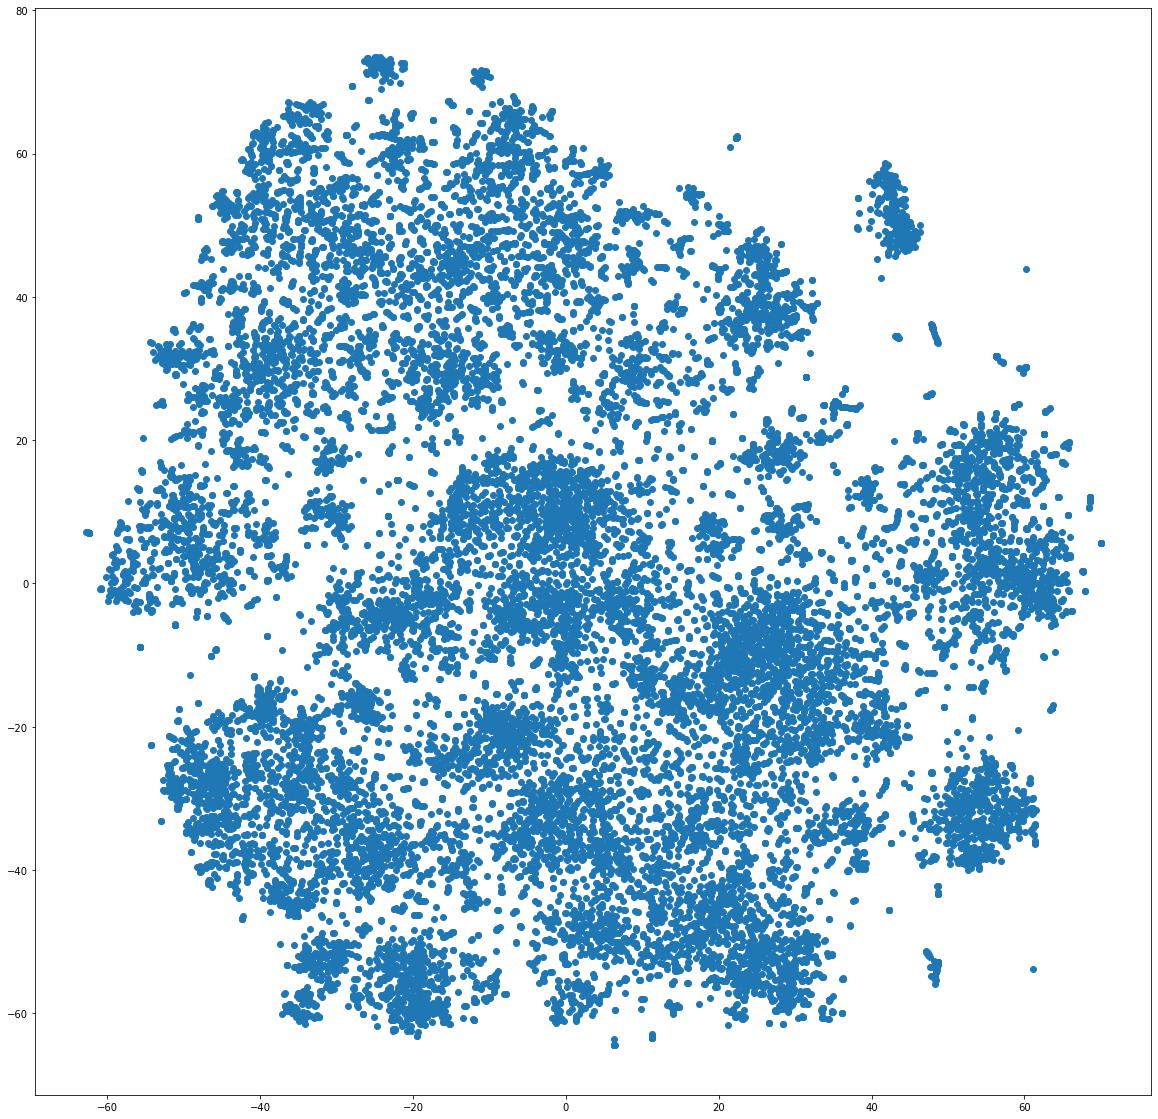

In [25]:
X = model[model.wv.vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(20,20))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [32]:
plt.savefig('../output/pca1.png')

<Figure size 432x288 with 0 Axes>

In [17]:
def draw_words(model, words, pca=False, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    # get vectors for given words from model
    vectors = [model[word] for word in words]

    if pca:
        pca = PCA(n_components=2, whiten=True)
        vectors2d = pca.fit(vectors).transform(vectors)
    else:
        tsne = TSNE(n_components=2, random_state=0)
        vectors2d = tsne.fit_transform(vectors)

    # draw image
    plt.figure(figsize=(20,20))
    if pca:
        plt.axis([x1, x2, y1, y2])

    first = True # color alternation to divide given groups
    for point, word in zip(vectors2d , words):
        try:
            # plot points
            plt.scatter(point[0], point[1], c='r' if first else 'g')
            # plot word annotations
            plt.annotate(
                word, 
                xy = (point[0], point[1]),
                xytext = (-7, -6) if first else (7, -6),
                textcoords = 'offset points',
                ha = 'right' if first else 'left',
                va = 'bottom',
                size = "x-large"
            )
            first = not first if alternate else first
        except:
            continue

    # draw arrows
    if arrows:
        for i in range(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.05,
                width=0.01
            )

    # draw diagram title
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.savefig('../output/pca2.png')
    plt.show()

/Users/oren/opt/anaconda3/envs/skills_ml/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


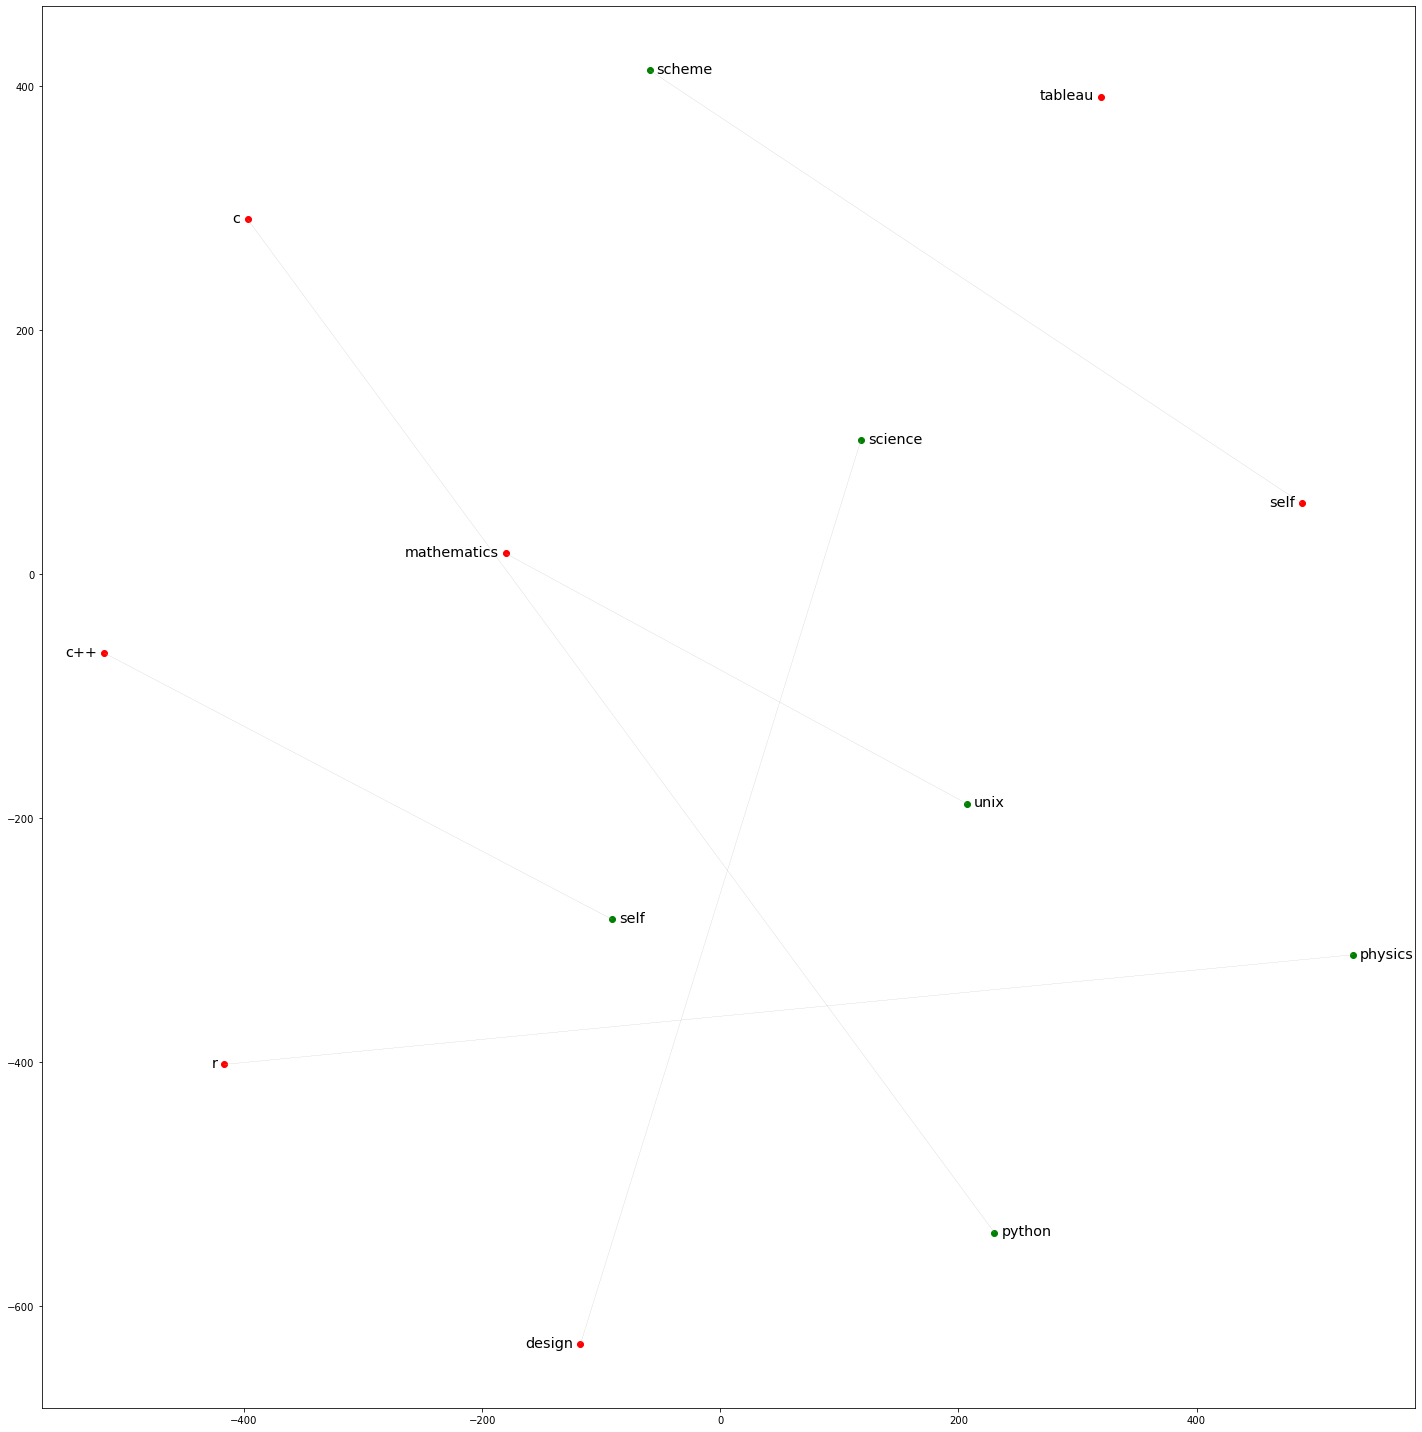

In [147]:
draw_words(model, df[df['soc']==soc]['skills'].values[1]+df[df['soc']==soc]['skills'].values[0])

# Plot skills for occupations

In [18]:
def soc_skill_barplot(soc):
    
    skills_list = []
    for i in range(df[df['soc']==soc].shape[0]):
        skills_list += df[df['soc']==soc]['skills'].values[i]
        
    skills_counter = Counter(skills_list)
    key, value = zip(*skills_counter.items())
    indexes = np.arange(len(key))
    width = 1

#     plt.figure(figsize=(30,20))
    plt.bar(indexes, value, width)
    plt.xticks(indexes + width * 0.5, key)
    plt.xticks(rotation=90)
    plt.semilogy()
    plt.show()


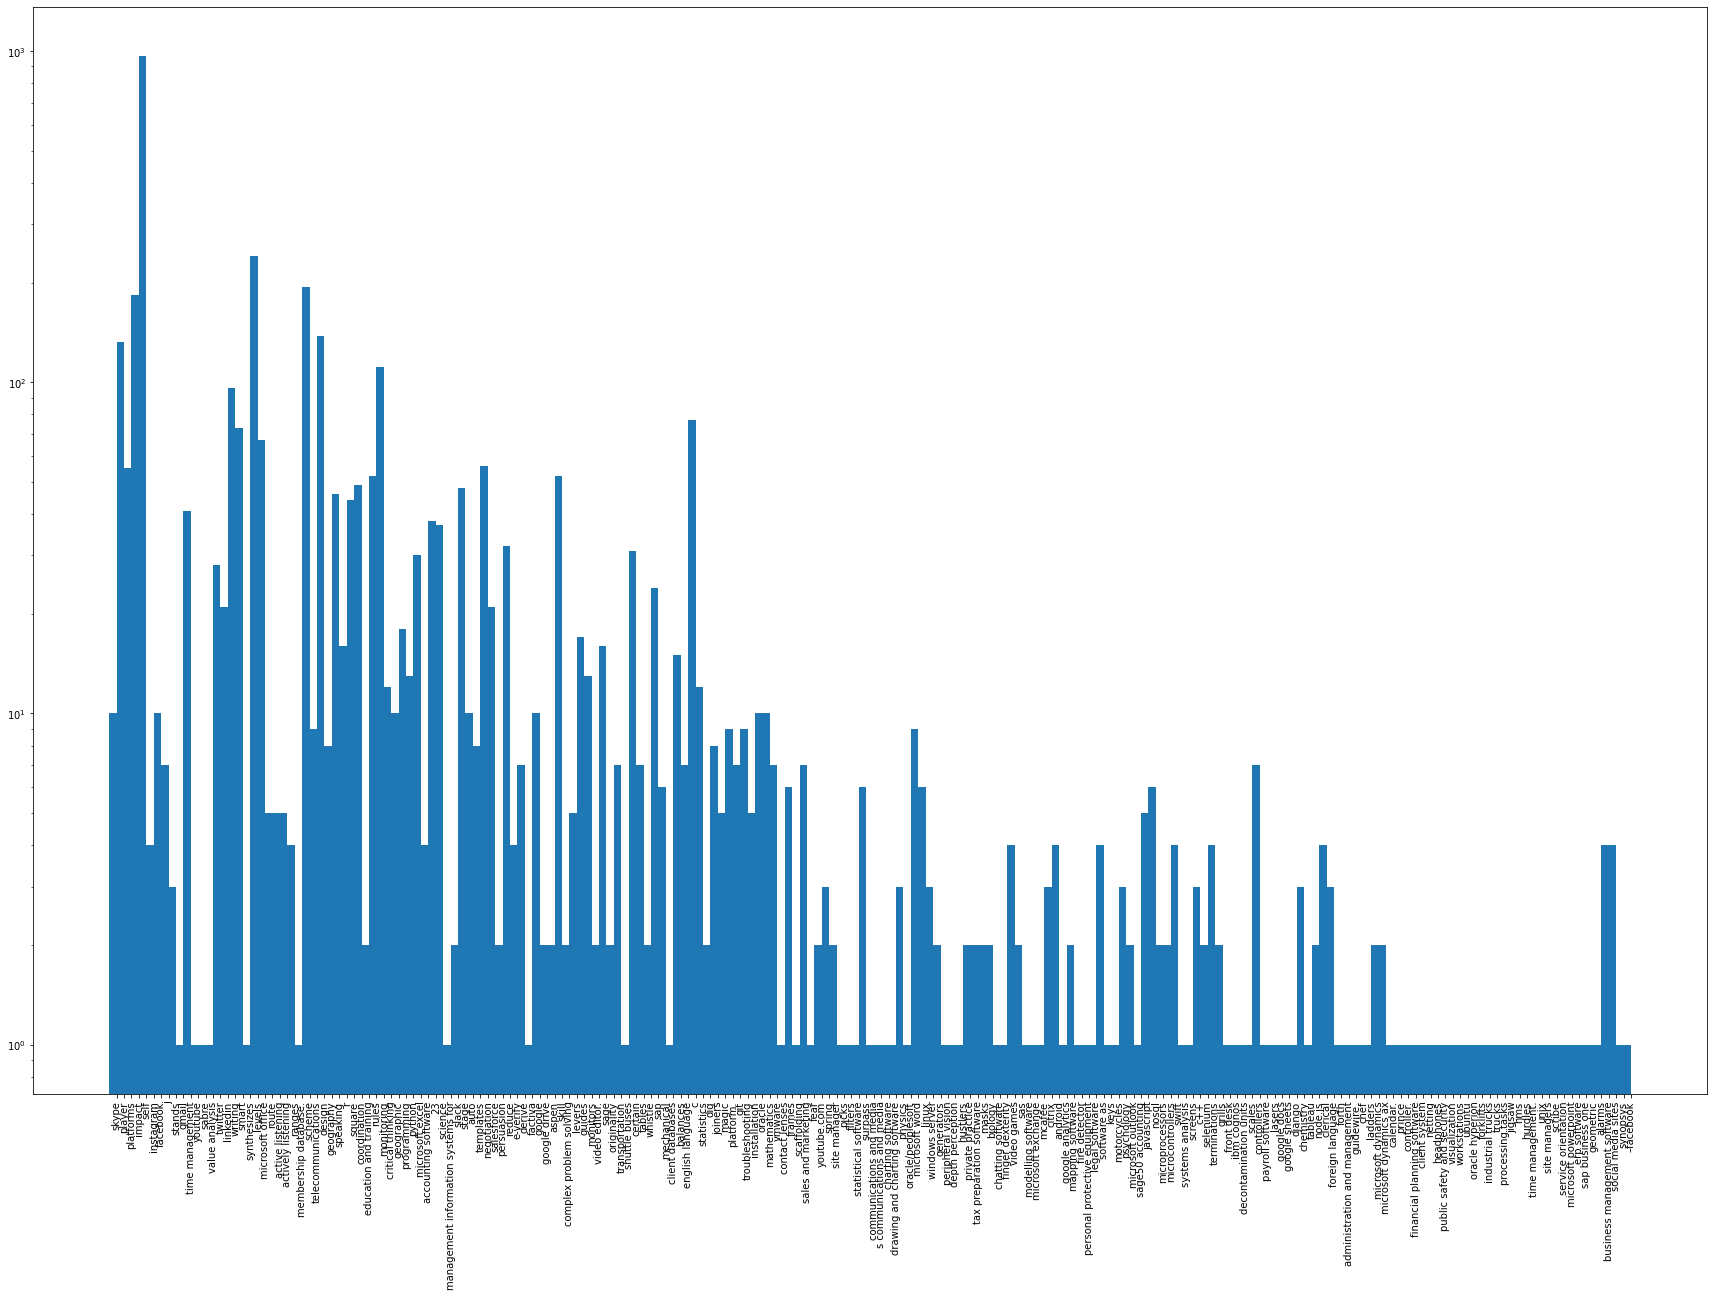

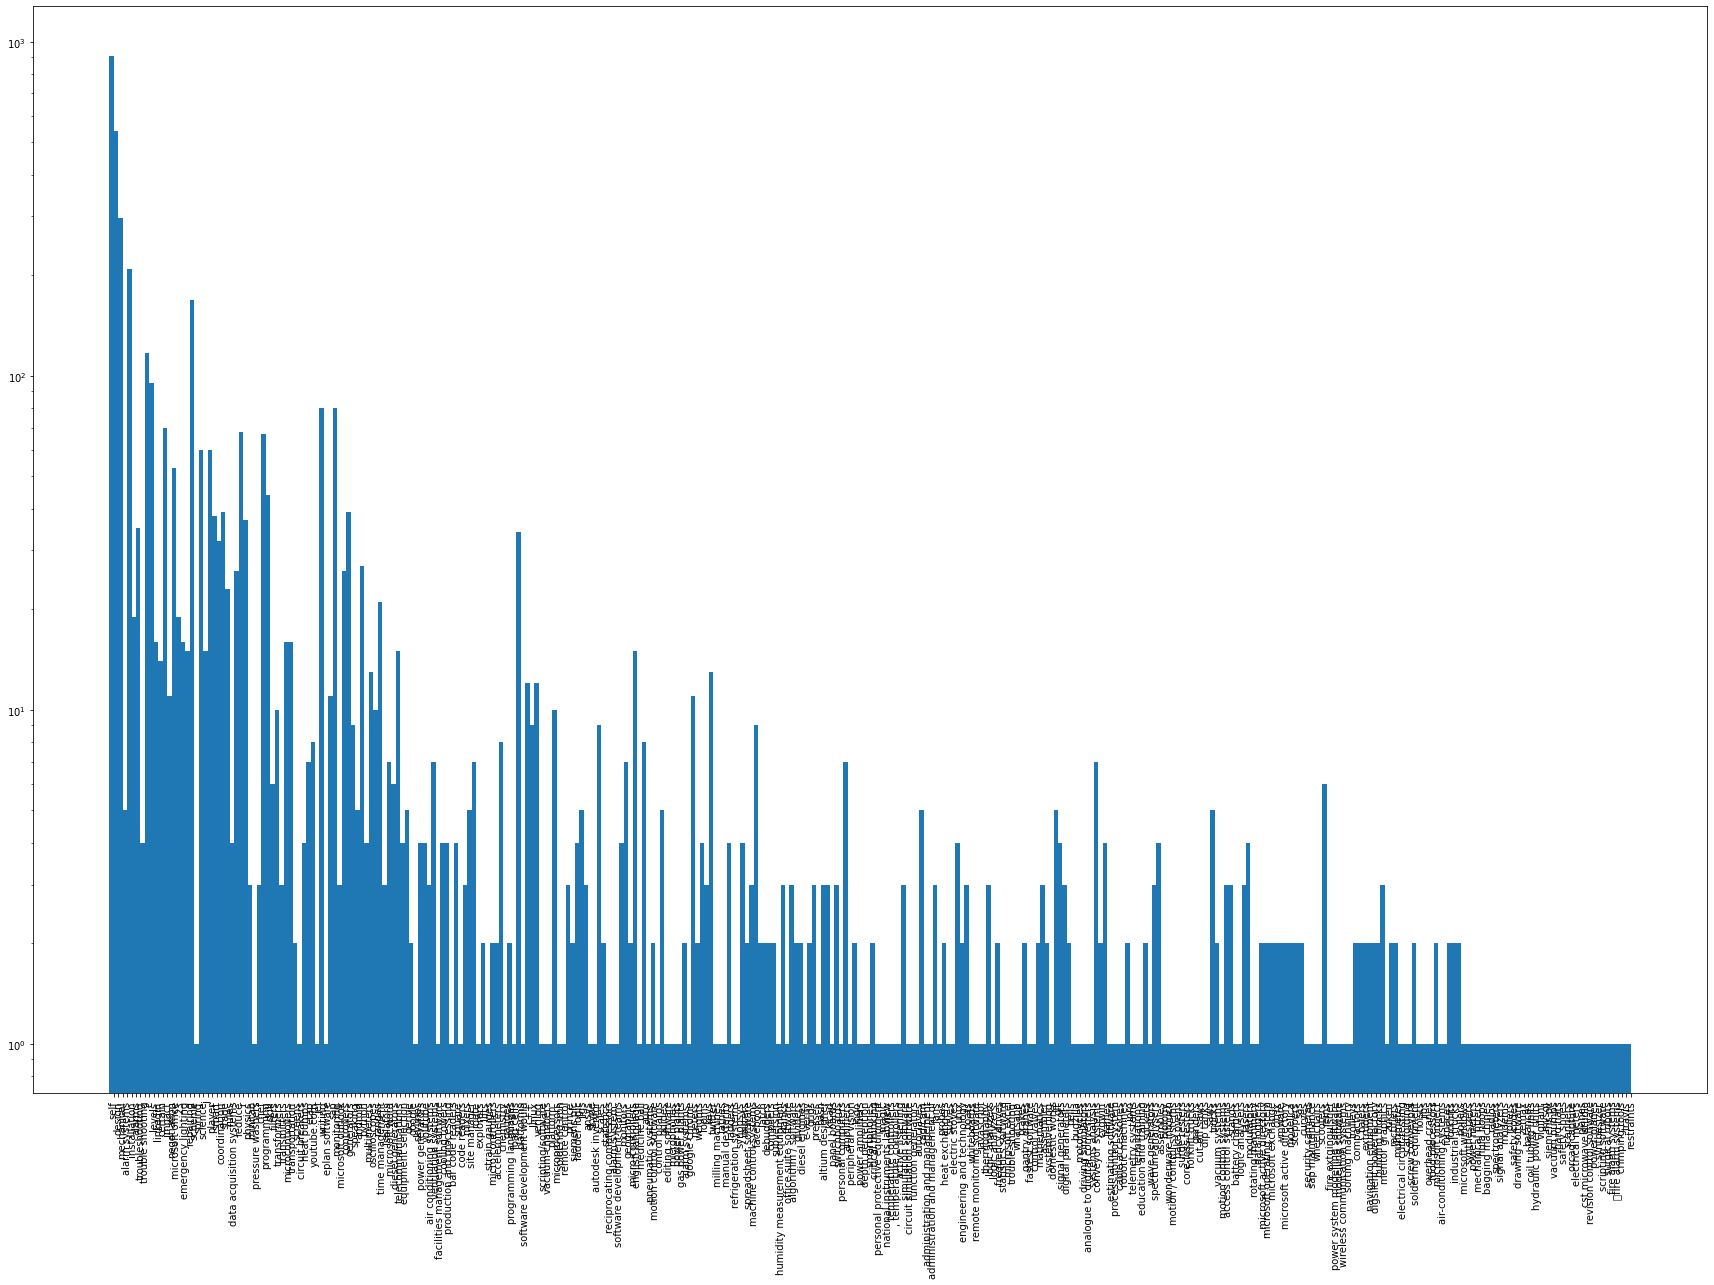

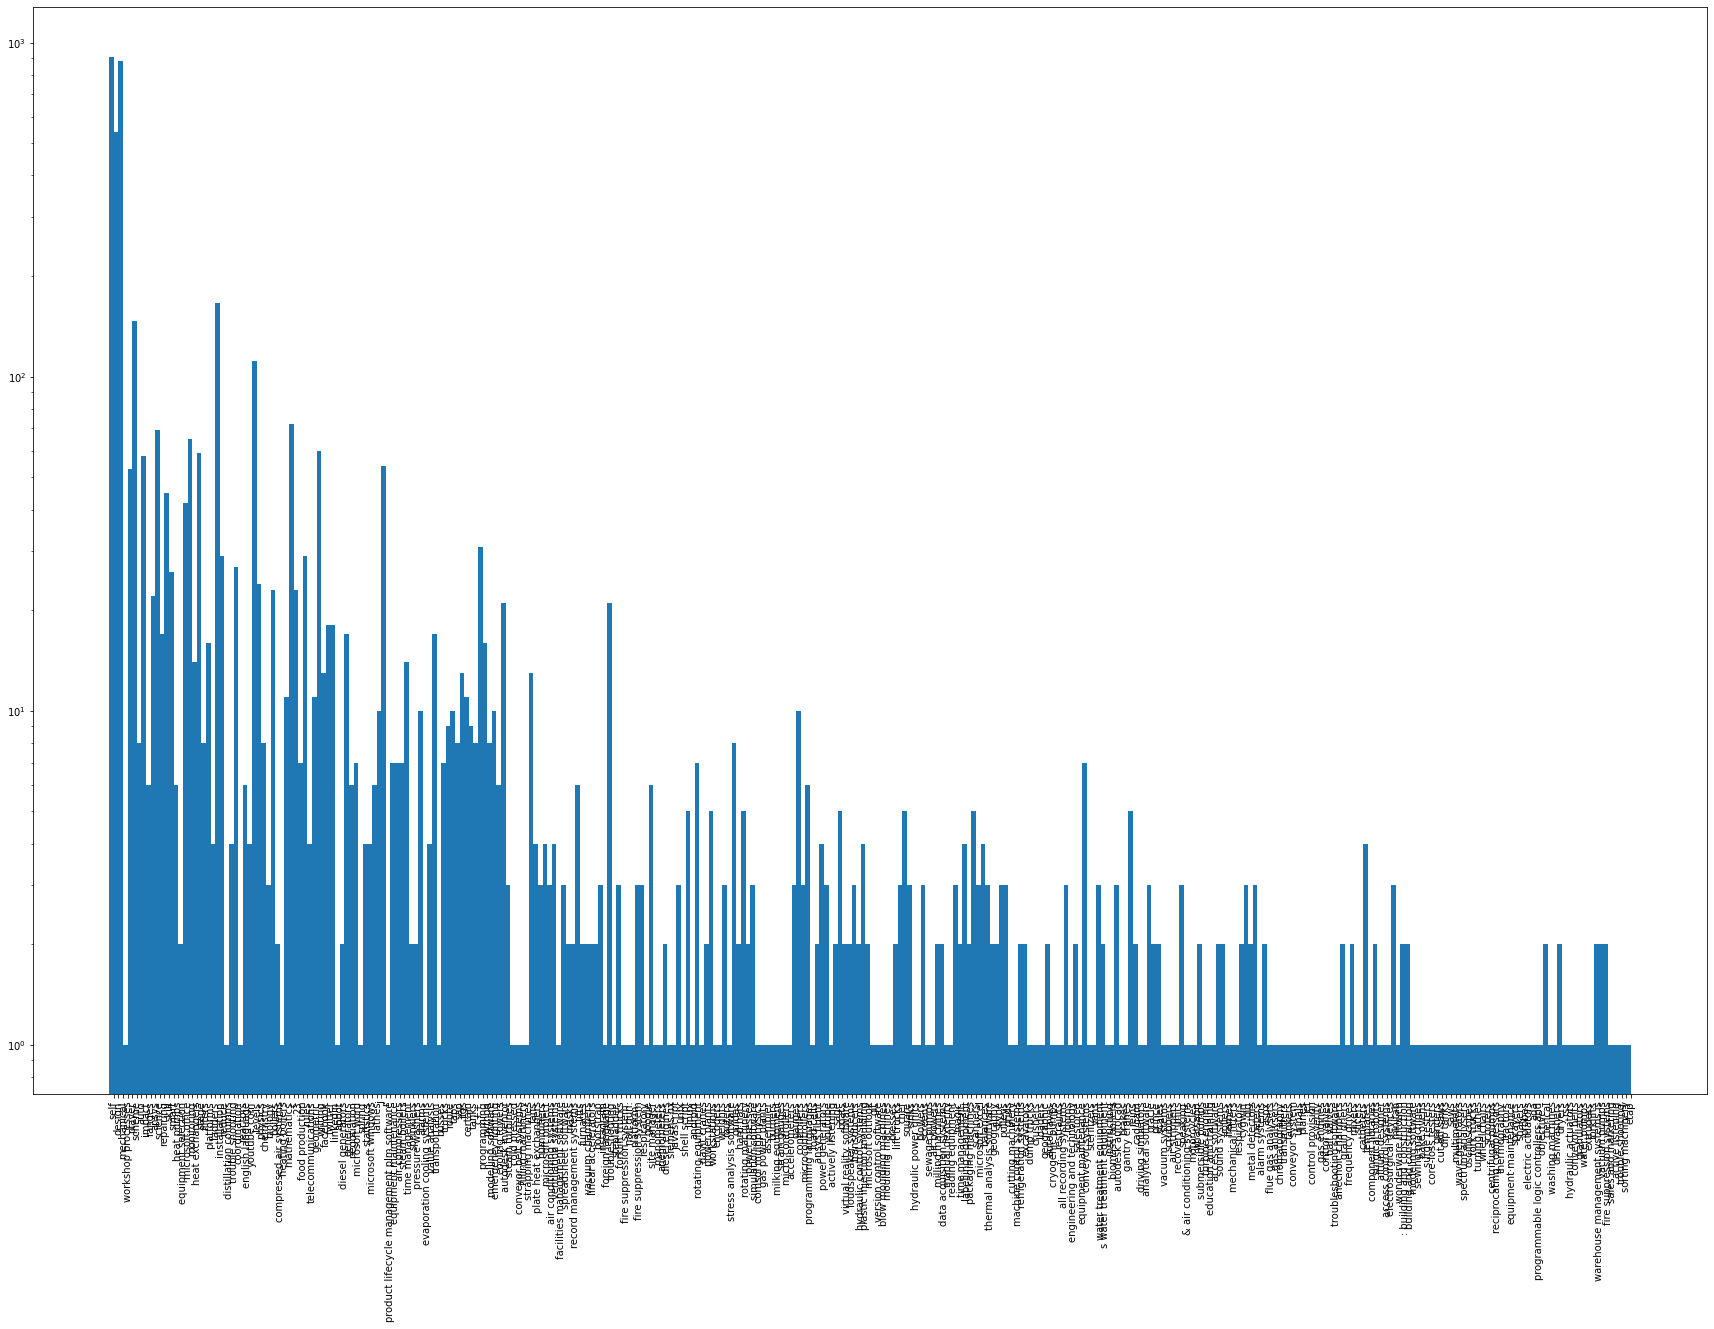

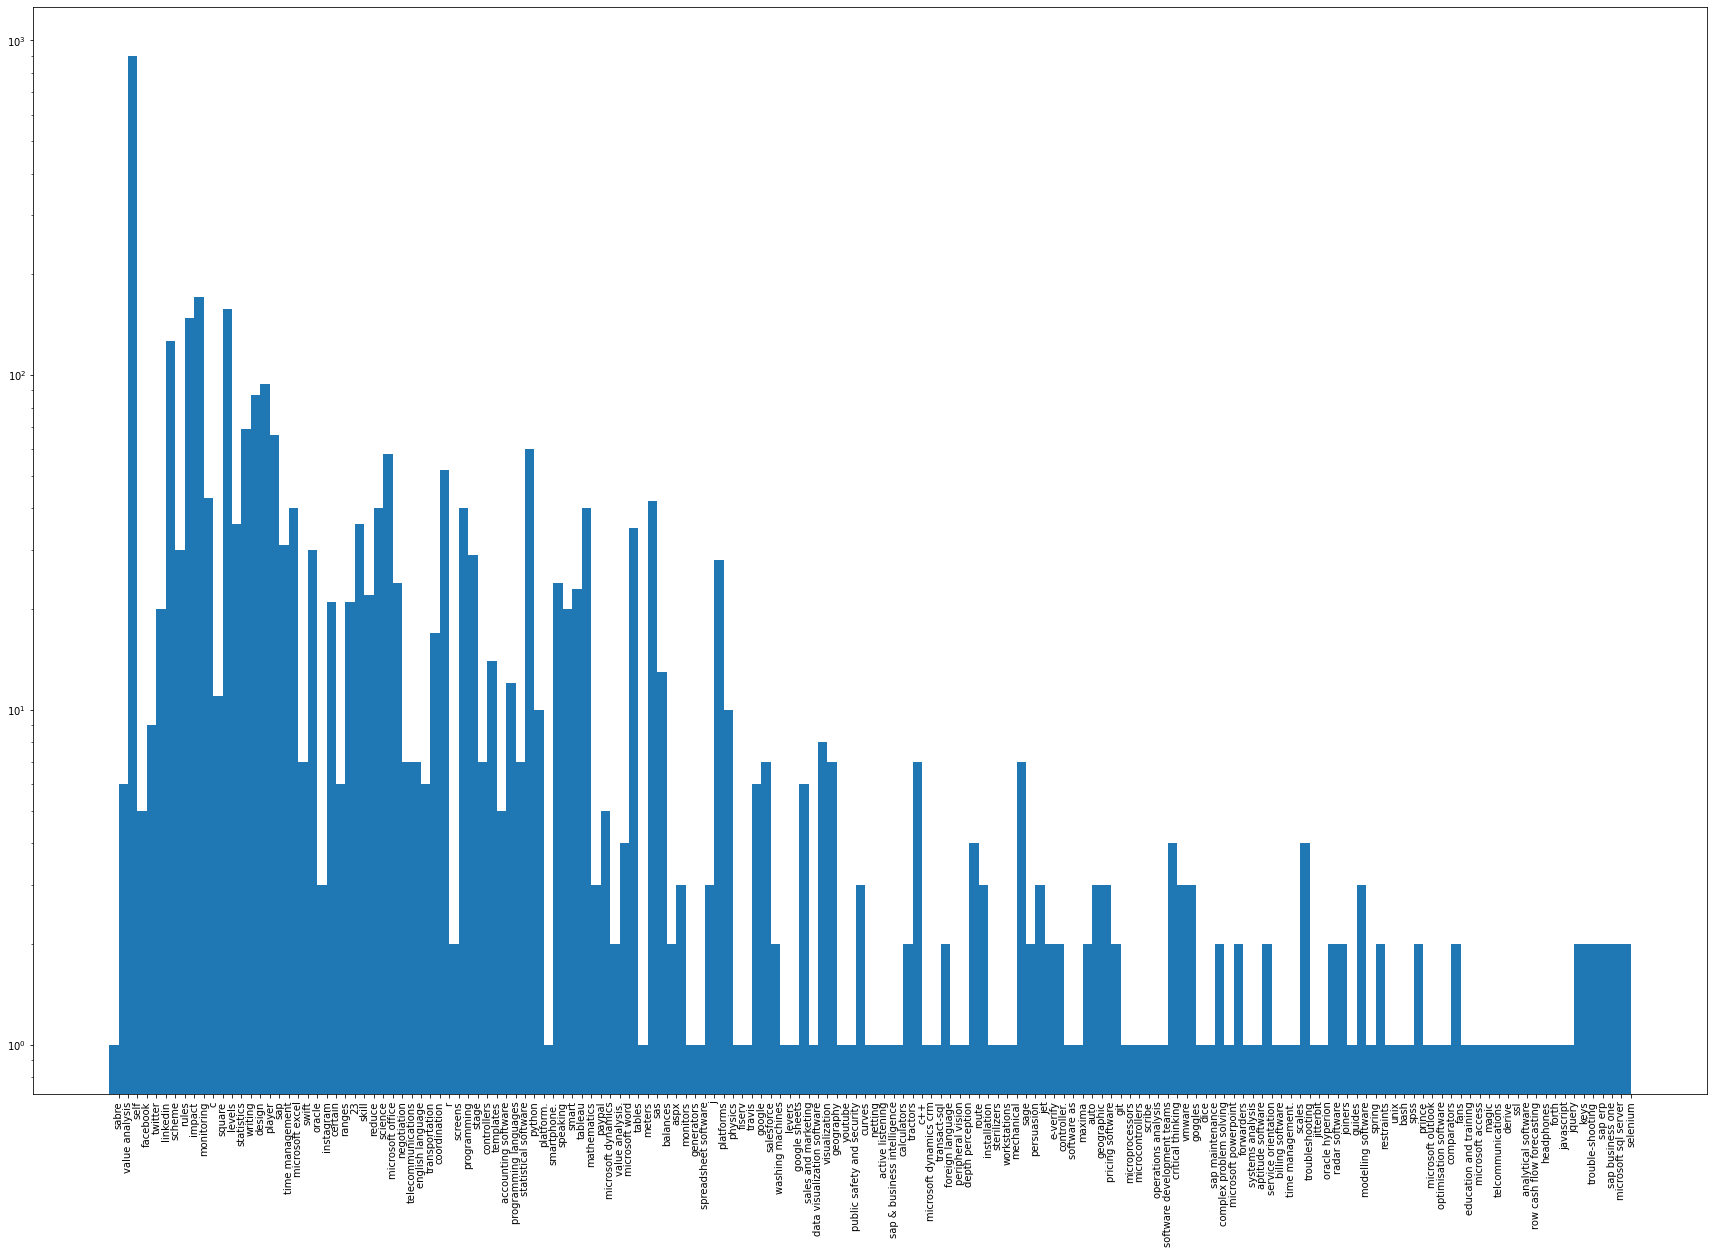

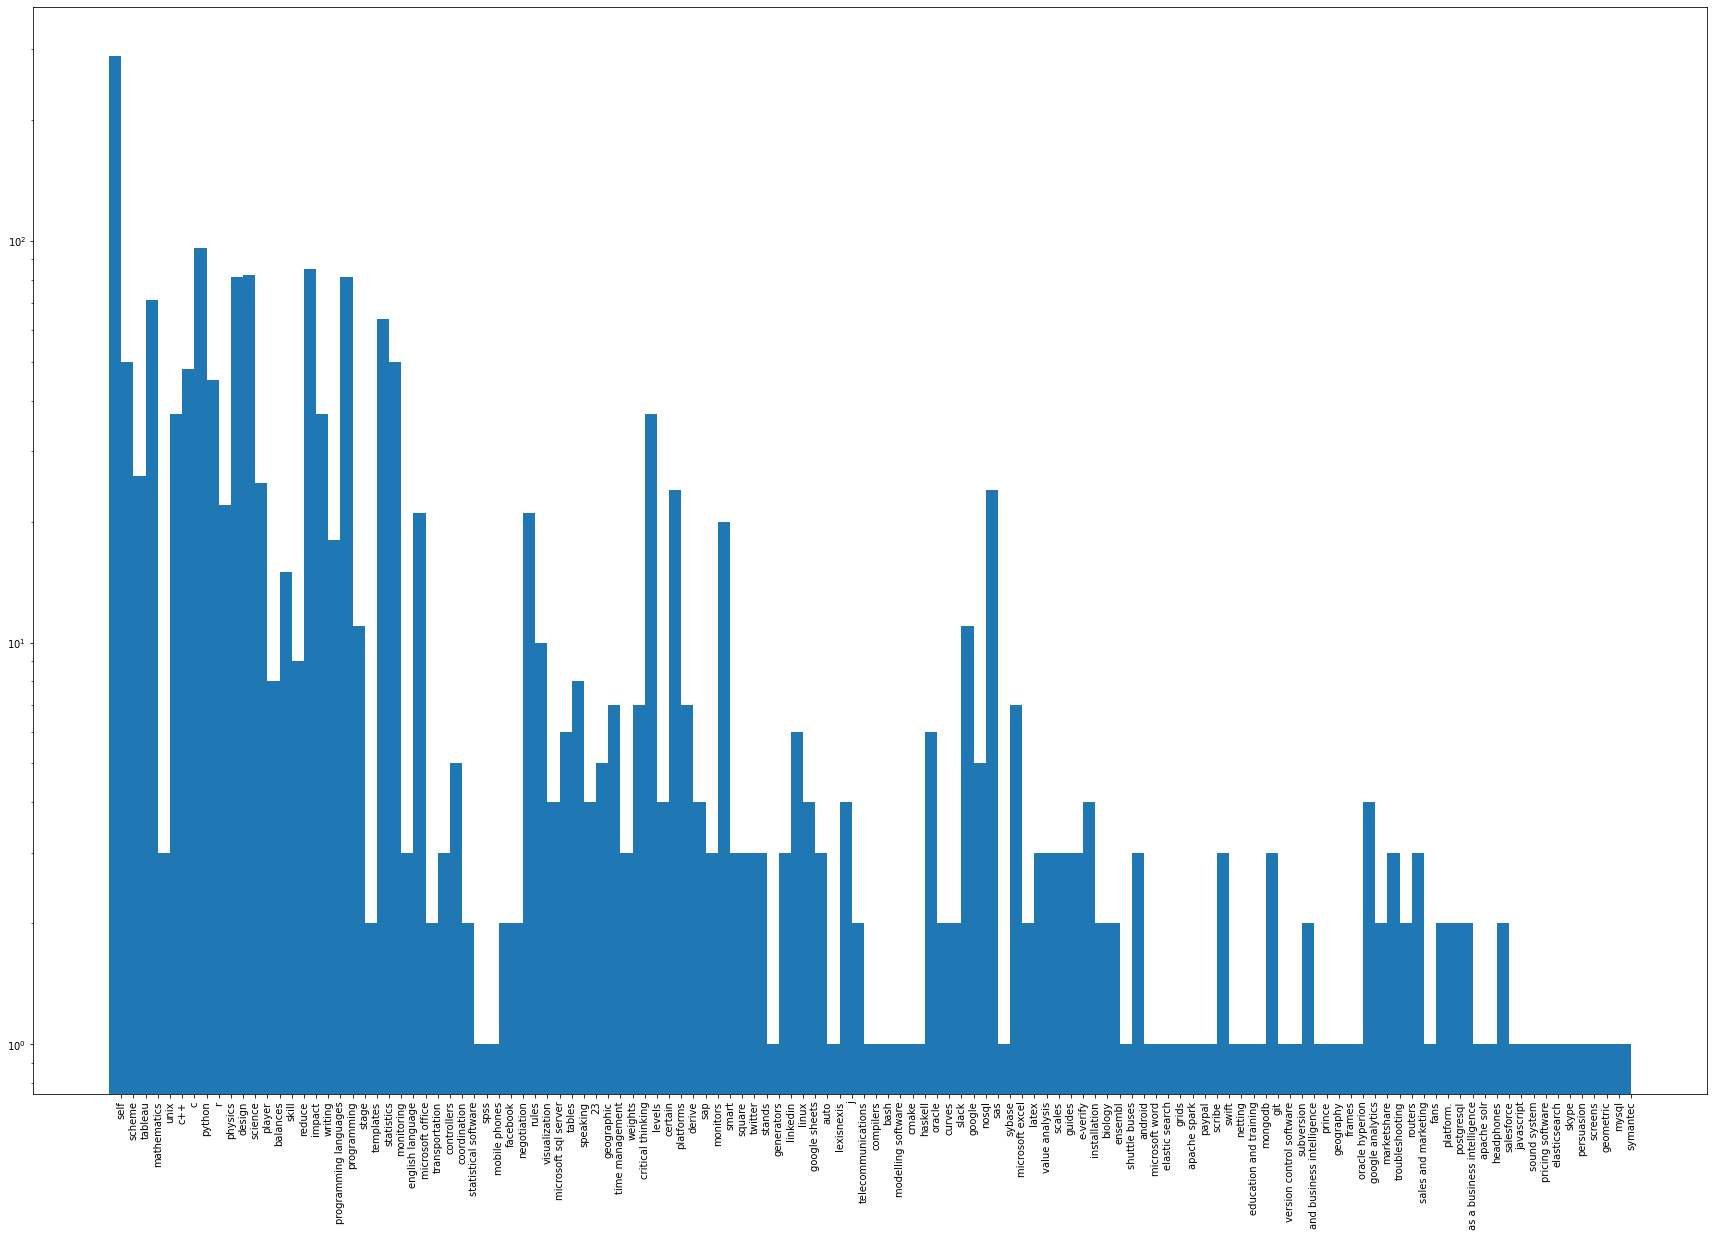

In [31]:
soc_list = list(df.soc.value_counts().keys())
# fig, axes = plt.subplots(5,1,figsize=(30,100))
for i, soc in enumerate(soc_list):
    soc_skill_barplot(soc)
#     print(i)
#     axes[i].set_title('SOC code: {0}'.format(soc))
#     axes[i].set_xlabel('Skills')
#     axes[i].set_ylabel('Count')

In [19]:
def soc_skill(soc):
    
    skills_list = []
    for i in range(df[df['soc']==soc].shape[0]):
        skills_list += df[df['soc']==soc]['skills'].values[i]
        
    skills_counter = Counter(skills_list)
    key, value = zip(*skills_counter.items())
    
    return key

/Users/oren/opt/anaconda3/envs/skills_ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/Users/oren/opt/anaconda3/envs/skills_ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/Users/oren/opt/anaconda3/envs/skills_ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/Users/oren/opt/anaconda3/envs/skills_ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after remo

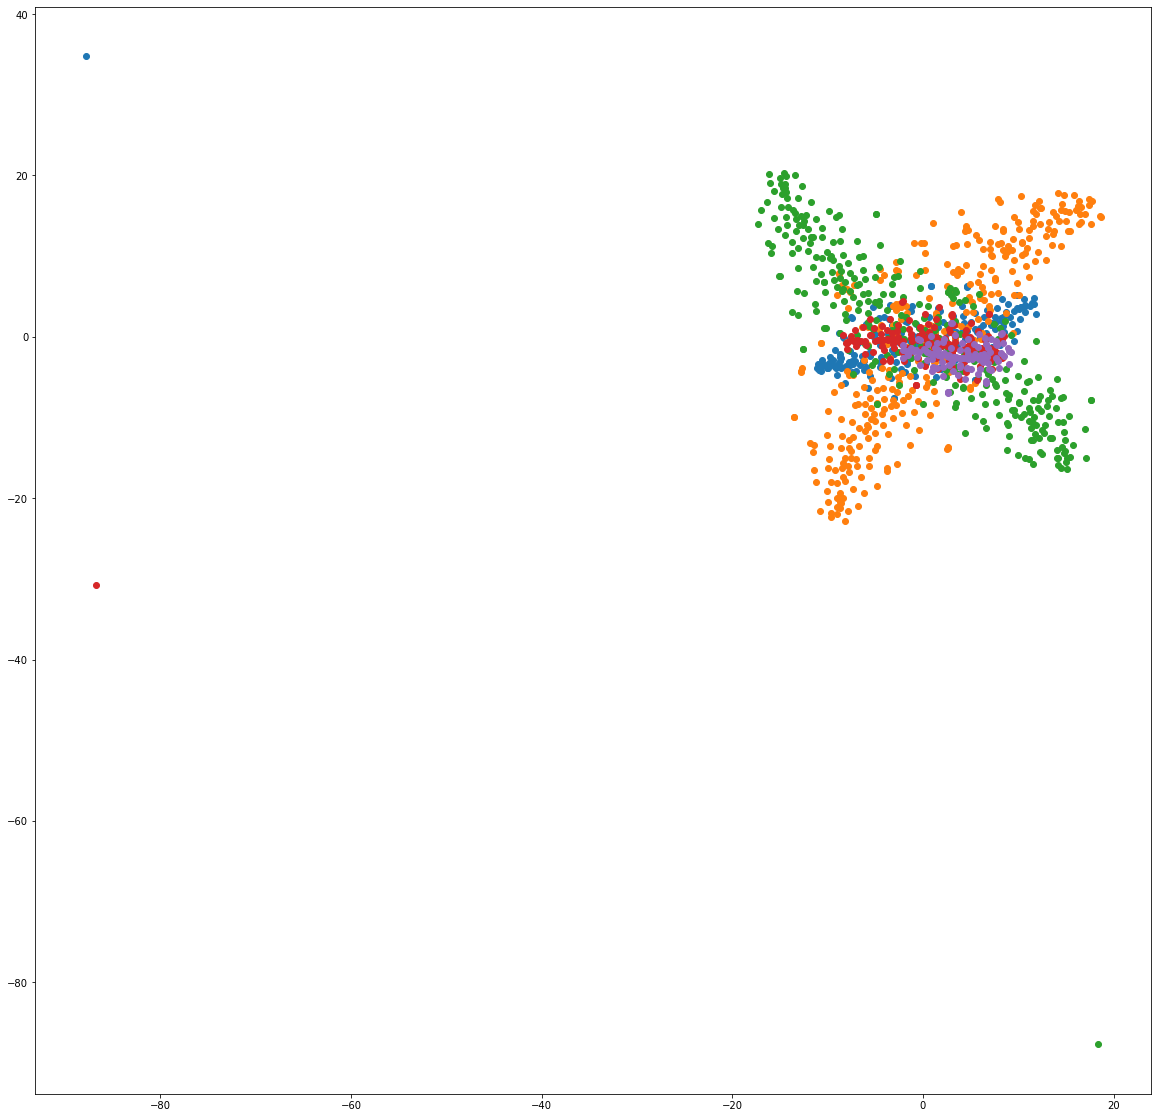

In [27]:
plt.figure(figsize=(20,20))

for soc in soc_list:
    X = model[list(soc_skill(soc))]
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(X)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
#     plt.legend(soc)

    
# X = model[list(soc_skill(soc_list[0]))]
# tsne = TSNE(n_components=2)
# X_tsne = tsne.fit_transform(X)

# X2 = model[list(model.wv.vocab.keys())[0:100]]
# X2_tsne = tsne.fit_transform(X2)

# plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
# plt.scatter(X2_tsne[:, 0], X2_tsne[:, 1])
plt.show()

/Users/oren/opt/anaconda3/envs/skills_ml/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


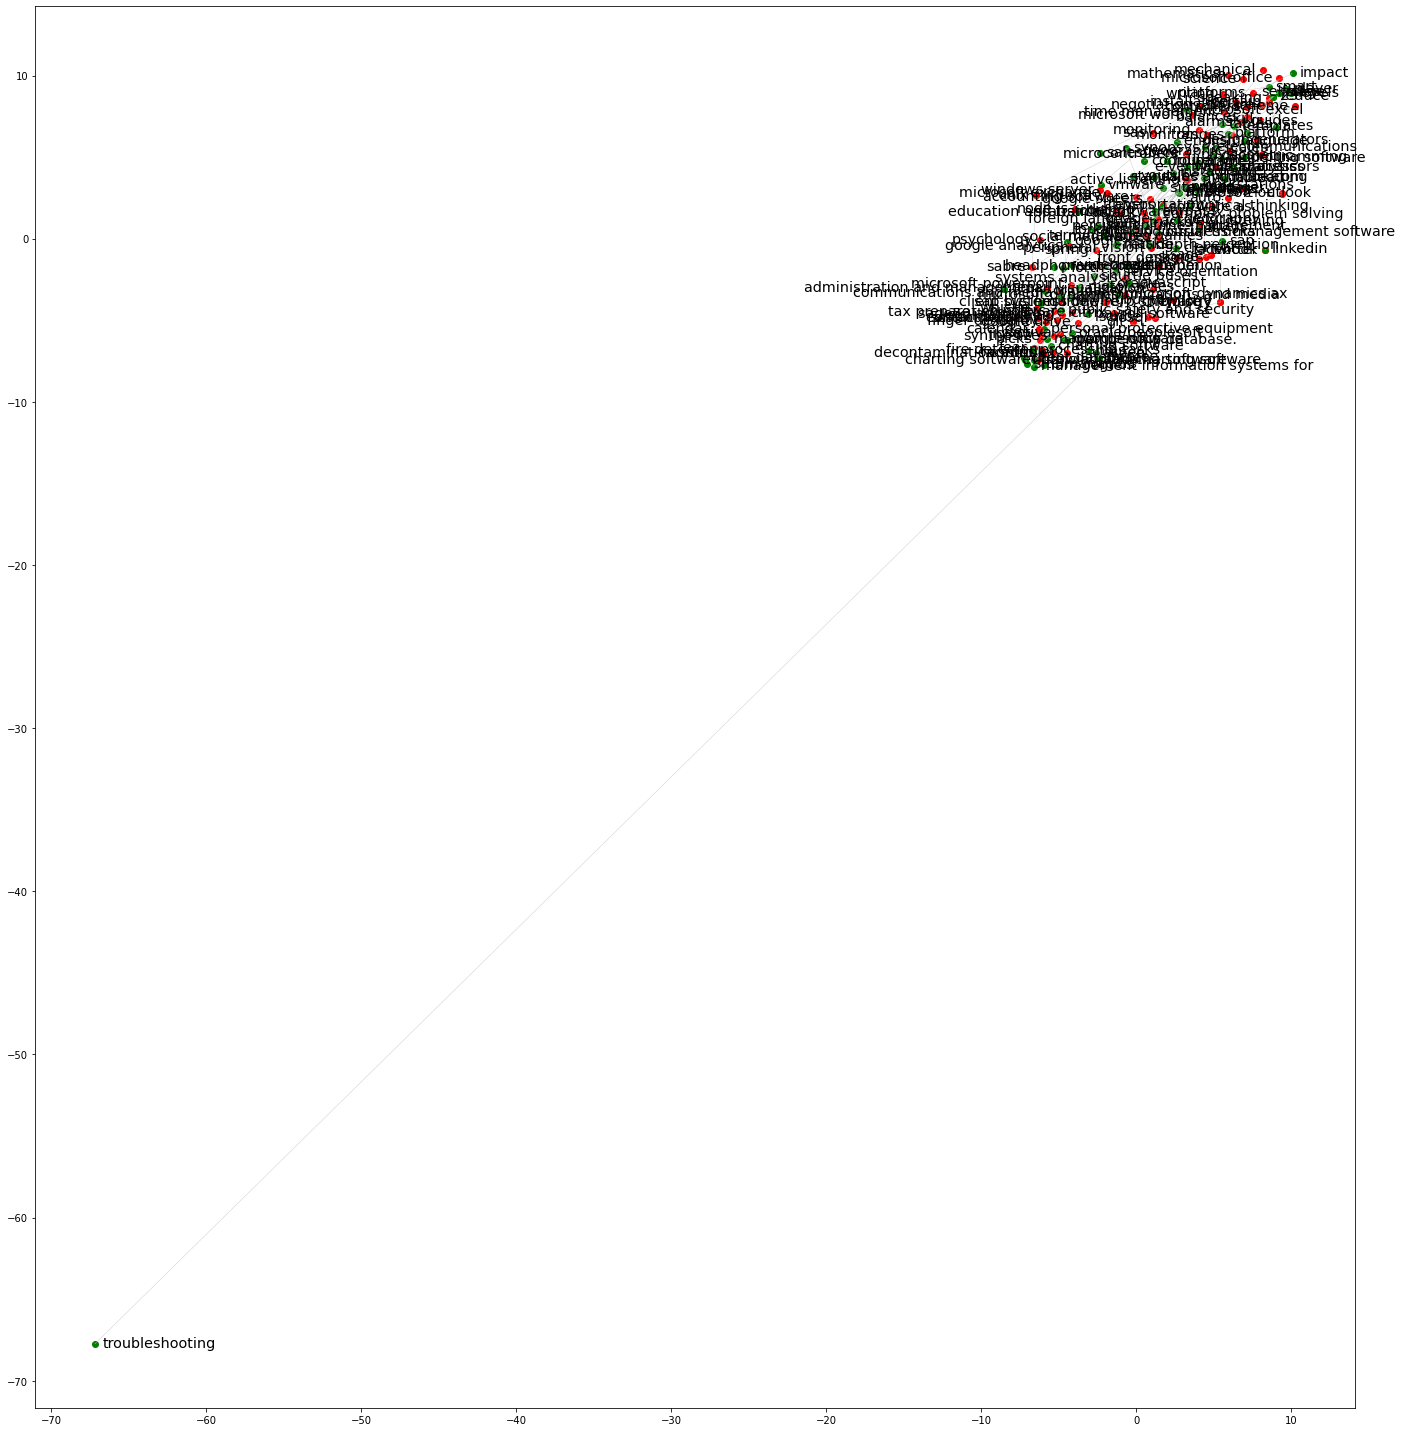

/Users/oren/opt/anaconda3/envs/skills_ml/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/oren/opt/anaconda3/envs/skills_ml/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 61623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/oren/opt/anaconda3/envs/skills_ml/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 61623 missing from current font.
  font.set_text(s, 0, flags=flags)


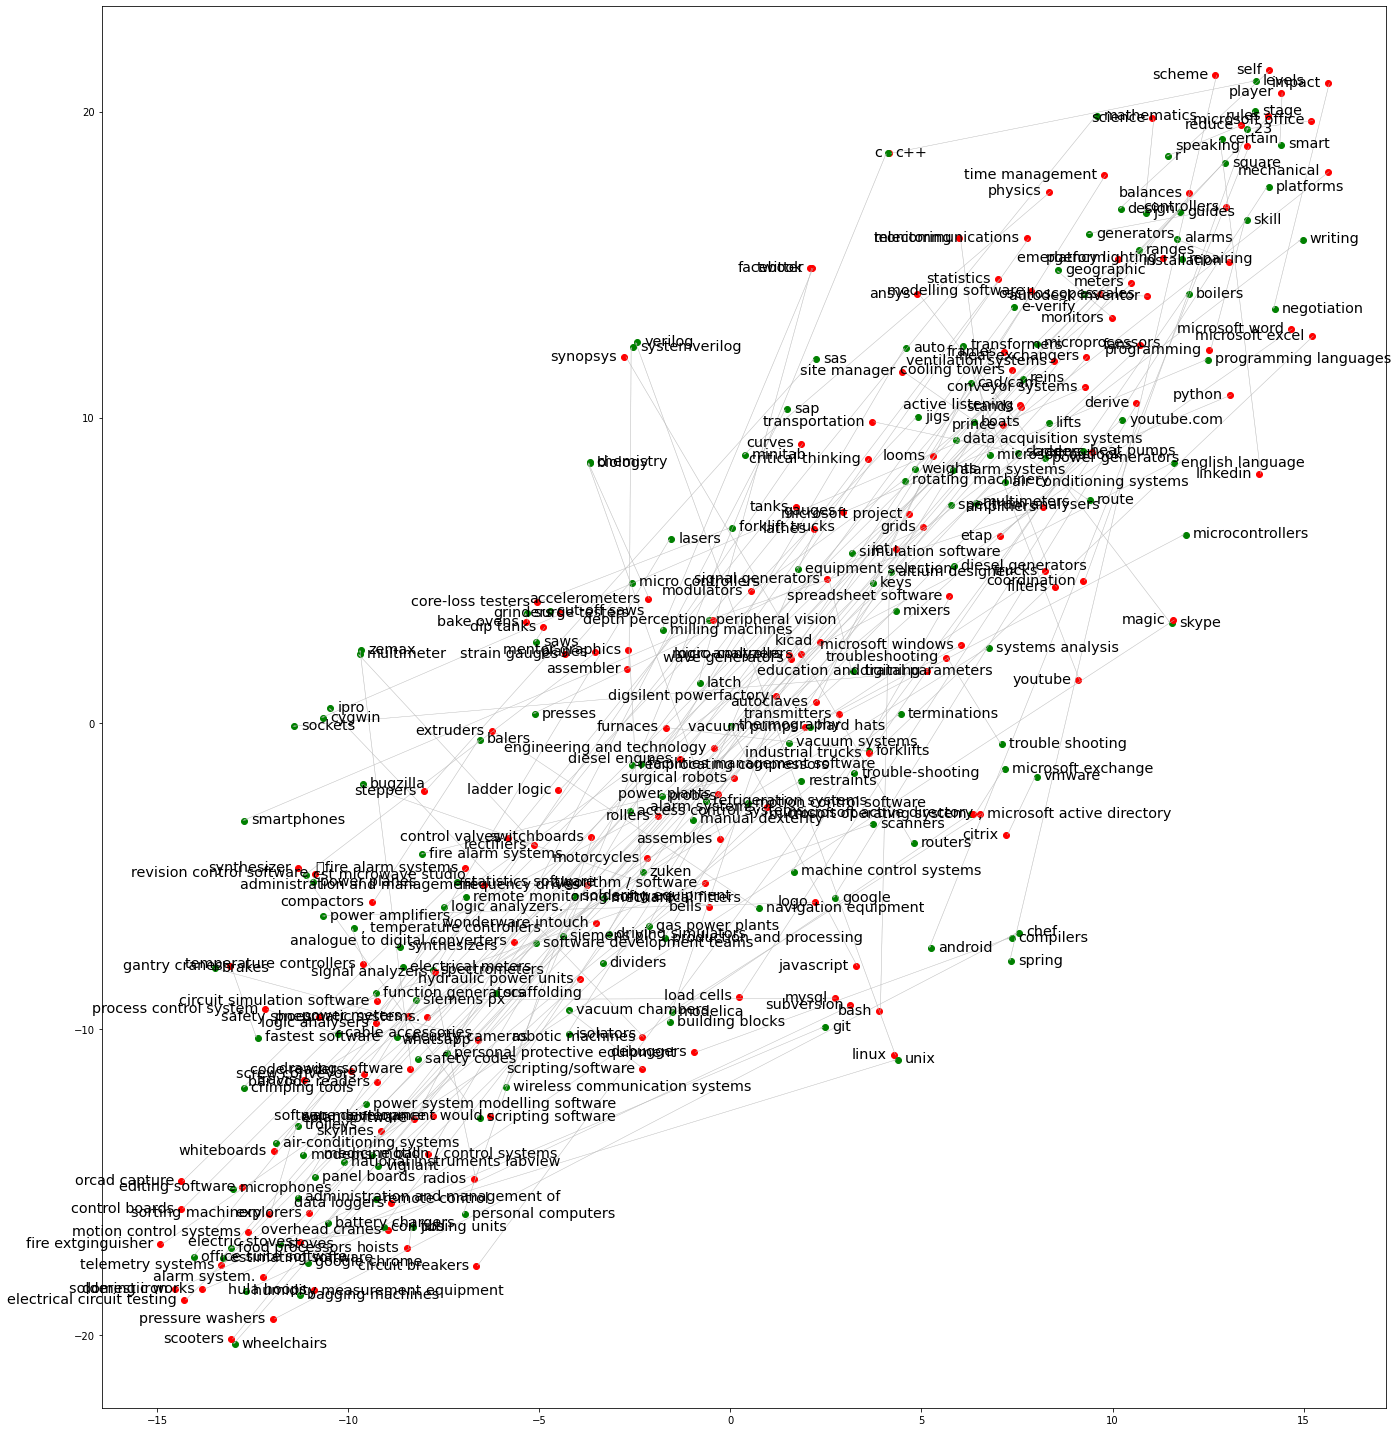

In [29]:
draw_words(model, list(soc_skill(soc_list[0])))
draw_words(model, list(soc_skill(soc_list[1])))